# Home Assignment No. 2 - part two

To solve this task, you will write a lot of code to try several machine learning methods for classification and regression.
* You are **HIGHLY RECOMMENDED** to read relevant documentation, e.g. for [python](https://docs.python.org/3/), [numpy](https://docs.scipy.org/doc/numpy/reference/), [matlpotlib](https://matplotlib.org/) and [sklearn](https://scikit-learn.org/stable/). Also remember that seminars, lecture slides, [Google](http://google.com) and [StackOverflow](https://stackoverflow.com/) are your close friends during this course (and, probably, whole life?).

* If you want an easy life, you have to use **BUILT-IN METHODS** of `sklearn` library instead of writing tons of your own code. There exists a class/method for almost everything you can imagine (related to this homework).

* You have to write **CODE** directly inside specified places marked by comments: **BEGIN/END Solution**. Do not create new cells.

* In some problems you are asked to provide a short discussion of the results. For that find the specific place marked via **Your text answer: \<write your answer\>**.

* For every separate problem or subproblem (if specified) you can get only 0 points or maximal points for this problem. There are **NO INTERMEDIATE scores**. So make sure that you did everything required in the task.

* Your **SOLUTION** notebook **MUST BE REPRODUCIBLE**, i.e., if the reviewer decides to restart the notebook and run all cells, after all the computation he will obtain exactly the same solution (with all the corresponding plots) as in your uploaded notebook. For this purpose, we suggest fixing random `seed` or (better) define `random_state=` inside every algorithm that uses some pseudorandomness.

* Your code must be clear to the reviewer. For this purpose, try to include necessary comments inside the code. But remember: **GOOD CODE MUST BE SELF-EXPLANATORY** without any additional comments.

* Many `sklearn` algorithms support multithreading (Ensemble Methods, Cross-Validation, etc.). Check if the particular algorithm has `n_jobs` parameters and set it to `-1` to use all the cores.


In [39]:
# Your imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from sklearn.covariance import EllipticEnvelope
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest


## Task 1 - Gaussian Processes (1 pt.)

In the following exercise, you will need to fit the gaussian process with different kernels on the ```elecricity_consumption_FR.csv``` time series data. We have already loaded and prepared the train/test datasets for you below.

Use [**GPy**](https://pypi.python.org/pypi/GPy) library for training and prediction. Fit a GP and run the predict on the test. Useful kernels to combine: `GPy.kern.RBF, GPy.kern.Poly, GPy.kern.StdPeriodic, GPy.kern.White, GPy.kern.Linear`. 

**The task**:
* Normalize the target value by fitting a transformation on the train (use ```sklearn.preprocessing.StandardScaler```)
* Plot the resulting target against the time index.
* Plot mean and confidence interval of the prediction. 
* Inspect them on normality by scatter plot: plot predicted points/time series against true values. 
* Estimate the prediction error with `r2_score`. R2-score accepted > 0.7 on test sample.

In [2]:
! pip install GPy

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import GPy

In [3]:
data = pd.read_csv('elecricity_consumption_FR.csv')

In [4]:
data.dropna(inplace=True)

In [5]:
y = np.array(data.values)
X = np.array(data.index)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.3)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)


Normalize the target value by fitting a transformation on the train (use sklearn.preprocessing.StandardScaler)

In [7]:
### BEGIN SOLUTION (do not delete this comment!)
sc = StandardScaler()
y_train_transformed = sc.fit_transform(y_train)
y_transformed = sc.transform(y)
y_test_transformed = sc.transform(y_test)
### END SOLUTION (do not delete this comment!)

Plot the resulting target against the time index.

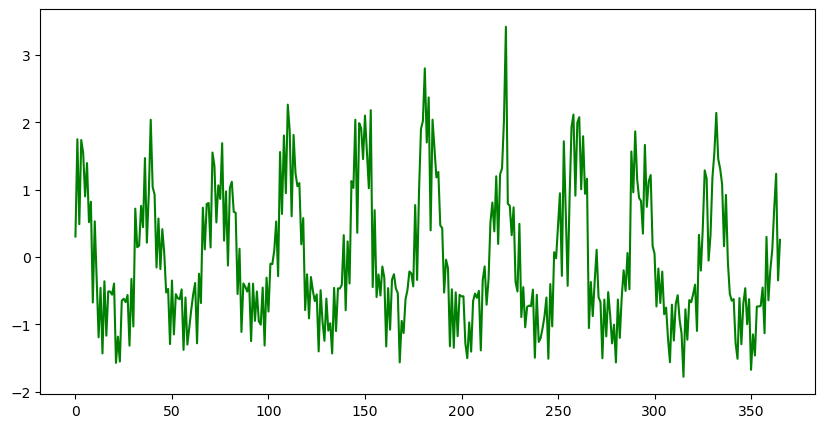

In [8]:
### BEGIN SOLUTION (do not delete this comment!)
fig = plt.figure(figsize=(10,5))
plt.plot(X,y_transformed,color='green')
plt.show()
### END SOLUTION (do not delete this comment!)

Plot mean and confidence interval of the prediction.

Optimization restart 1/20, f = 394.1806239778973
Optimization restart 2/20, f = 382.67724527120185
Optimization restart 3/20, f = 399.1353491145281
Optimization restart 4/20, f = 386.4275282264149
Optimization restart 5/20, f = 358.1368073938294
Optimization restart 6/20, f = 363.2482751362287
Optimization restart 7/20, f = 356.69293328254105
Optimization restart 8/20, f = 376.3880402514509
Optimization restart 9/20, f = 415.5749122952428
Optimization restart 10/20, f = 234.61596874076096
Optimization restart 11/20, f = 394.6982205730328
Optimization restart 12/20, f = 218.3448108435086


 c:\Users\denis\anaconda3\lib\site-packages\GPy\kern\src\standard_periodic.py:153: RuntimeWarning:overflow encountered in true_divide
 c:\Users\denis\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning:invalid value encountered in reduce


Optimization restart 13/20, f = 443.1165209061808
Optimization restart 14/20, f = 355.48142685727464
Optimization restart 15/20, f = 356.26423353595254
Optimization restart 16/20, f = 385.3789710959296
Optimization restart 17/20, f = 433.3396076073657
Optimization restart 18/20, f = 363.2482649014195
Optimization restart 19/20, f = 280.22807775498444
Optimization restart 20/20, f = 396.8029932301786


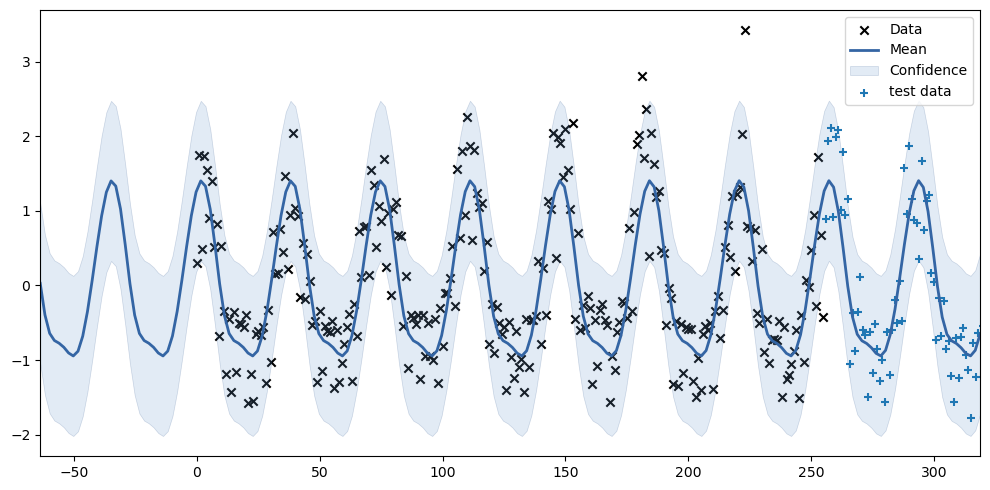

In [18]:
### BEGIN SOLUTION (do not delete this comment!)
input_dim = 1
kernel = GPy.kern.StdPeriodic(input_dim) + \
         GPy.kern.Poly(input_dim)

model = GPy.models.GPRegression(X_train, y_train_transformed, kernel)
model.optimize_restarts(num_restarts = 20)

y_test_pred = model.predict(X_test)[0]
model.plot(figsize=(10,5))
plt.scatter(X_test,y_test_transformed,marker='+',label='test data')
plt.legend()
plt.show()
### END SOLUTION (do not delete this comment!))

Inspect them on normality by scatter plot: plot predicted points/time series against true values.

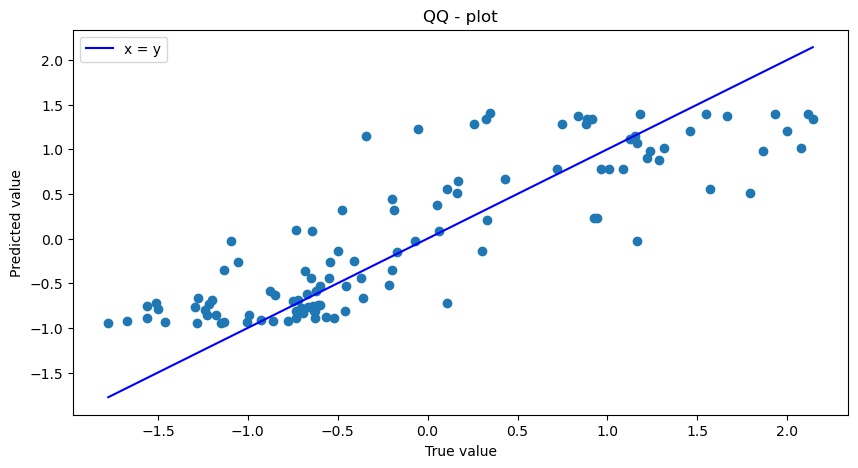

In [19]:

### BEGIN SOLUTION (do not delete this comment!)

fig = plt.figure(figsize=(10,5))
plt.title('QQ - plot')
plt.xlabel('True value')
plt.ylabel('Predicted value')
plt.scatter(y_test_transformed.ravel(),y_test_pred.ravel())
mi = np.min(np.append(y_test_transformed,y_test_pred))
ma = np.max(np.append(y_test_transformed,y_test_pred))
plt.plot([mi,ma],[mi,ma],color='blue',label='x = y')
plt.legend()
plt.show()
### END SOLUTION (do not delete this comment!)

Estimate the prediction error with r2_score. R2-score accepted > 0.7 on test sample.

In [20]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import r2_score



print('R2-score: ',r2_score(y_test_transformed.ravel(),y_test_pred.ravel()))
### END SOLUTION (do not delete this comment!)

R2-score:  0.7216463888260198


## Task 2 - MNIST, kMNIST component analysis and manifold learning. (5 pts.)

### Task 2.1. (1 pt)

Download `MNIST` dataset. Here we will estimate the data intrinsic dimensionality, decompose the dataset on principle components and estimate the cumulative explained variance by each component.

You can either use the [proposed method](https://www.stat.berkeley.edu/~bickel/mldim.pdf) for the estimation of sample intrinsic dimension or any other method (convenient for you). For the first case, yoyu may use the code from [here](https://gist.github.com/mehdidc/8a0bb21a31c43b0cbbdd31d75929b5e4)

1. Estimate the intrinsic dimensionality of the dataset. Provide the plot.
2. Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with **6** different set of components and corresponding explained variance. You can choose any digit from the dataset.

In [21]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler

dg = datasets.load_digits()

scaler = StandardScaler().fit(dg.data)
data = scaler.transform(dg.data)

1) Estimate the intrinsic dimentionality of the dataset. Provide the plot.

 C:\Users\denis\AppData\Local\Temp\ipykernel_11996\1272793723.py:2: TqdmExperimentalWarning:Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


  0%|          | 0/500 [00:00<?, ?it/s]

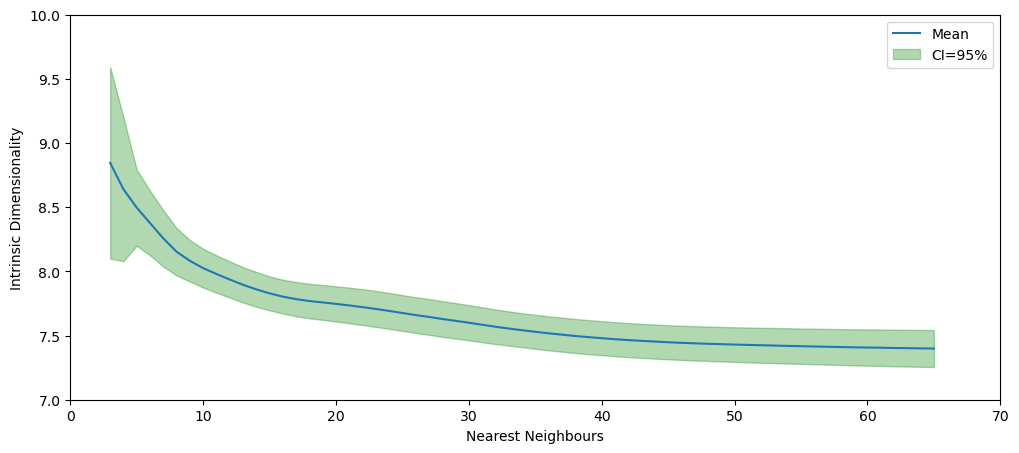

In [22]:
### BEGIN SOLUTION (do not delete this comment!)
from tqdm.autonotebook import tqdm
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

def intrinsic_dim_sample_wise(X, k=5):
    neighb = NearestNeighbors(n_neighbors=k + 1).fit(X)
    dist, ind = neighb.kneighbors(X)
    dist = dist[:, 1:]
    dist = dist[:, 0:k]
    assert dist.shape == (X.shape[0], k)
    assert np.all(dist > 0)
    d = np.log(dist[:, k - 1: k] / dist[:, 0:k-1])
    d = d.sum(axis=1) / (k - 2)
    d = 1. / d
    intdim_sample = d
    return intdim_sample

def intrinsic_dim_scale_interval(X, k1=10, k2=20):
    X = pd.DataFrame(X).drop_duplicates().values # remove duplicates in case you use bootstrapping
    intdim_k = []
    for k in range(k1, k2 + 1):
        m = intrinsic_dim_sample_wise(X, k).mean()
        intdim_k.append(m)
    return intdim_k

def repeated(func, X, nb_iter=100, random_state=None, verbose=0, mode='bootstrap', **func_kw):
    if random_state is None:
        rng = np.random
    else:
        rng = np.random.RandomState(random_state)
    nb_examples = X.shape[0]
    results = []

    iters = range(nb_iter)
    if verbose > 0:
        iters = tqdm(iters)    
    for i in iters:
        if mode == 'bootstrap':
            Xr = X[rng.randint(0, nb_examples, size=nb_examples)]
        elif mode == 'shuffle':
            ind = np.arange(nb_examples)
            rng.shuffle(ind)
            Xr = X[ind]
        elif mode == 'same':
            Xr = X
        else:
            raise ValueError('unknown mode : {}'.format(mode))
        results.append(func(Xr, **func_kw))
    return results

k1 = 3 # start of interval(included)
k2 = 65 # end of interval(included)
intdim_k_repeated = repeated(intrinsic_dim_scale_interval, 
                             data, 
                             mode='bootstrap', 
                             nb_iter=500, 
                             verbose=1, 
                             k1=k1, k2=k2)
intdim_k_repeated = np.array(intdim_k_repeated)

m = intdim_k_repeated.mean(axis=0)
s = intdim_k_repeated.std(axis=0)

plt.figure(figsize=(12,5))
plt.plot(range(k1,k2+1),m,label='Mean')
plt.fill_between(range(k1,k2+1),m-s,m+s,alpha=0.3,color='green',label='CI=95%')
plt.xlim([0,k2+5])
plt.ylim([7,10])
plt.xlabel('Nearest Neighbours')
plt.ylabel('Intrinsic Dimensionality')
plt.legend()
plt.show()

### END SOLUTION (do not delete this comment!)

2) Decompose the data on principal components (PCA). Plot the cumulative explained variance by each component. Plot the example of back-decomposition with 6 different set of components and corresponding explained variance. You can choose any digit from the dataset.

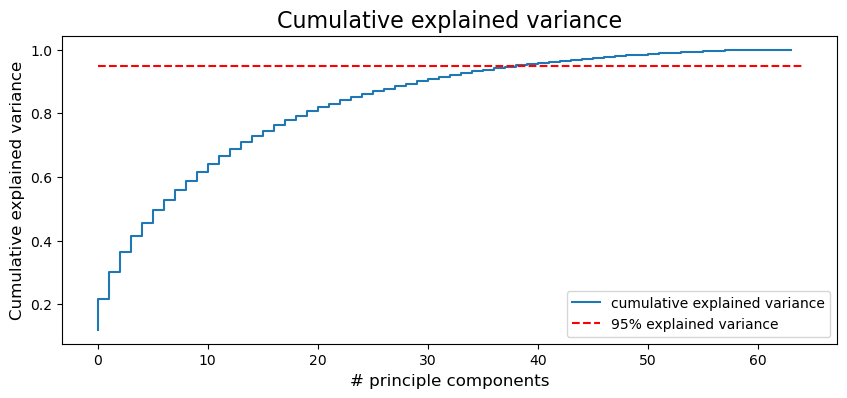

In [23]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.decomposition import PCA

pca = PCA().fit(data)

plt.figure(figsize=(10, 4))

plt.step(range(len(pca.components_)),np.cumsum(pca.explained_variance_ratio_), label='cumulative explained variance')
plt.title('Cumulative explained variance', fontsize=16)
plt.xlabel('# principle components', fontsize=12)
plt.ylabel('Cumulative explained variance', fontsize=12)

plt.hlines(y=0.95, xmin=0, xmax= len(pca.components_), colors='r', linestyles='dashed', label='95% explained variance')
plt.legend(loc='lower right')
plt.show()


### END SOLUTION (do not delete this comment!)

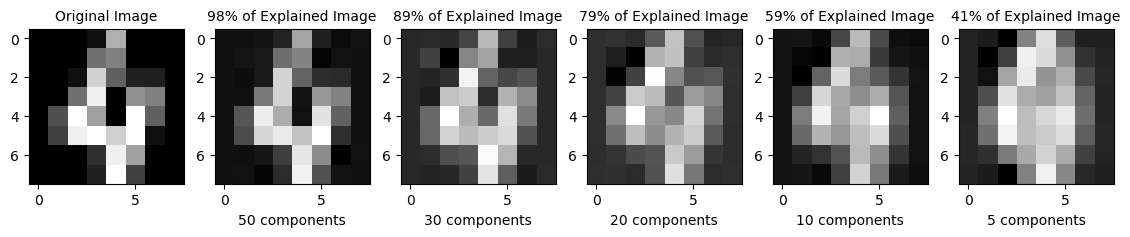

In [24]:
### BEGIN SOLUTION (do not delete this comment!)
components_to_fit = [50,30,20,10,5]
fig,axes = plt.subplots(1,len(components_to_fit)+1,figsize=(14,5))

num_of_digit = 4
axes[0].imshow(scaler.inverse_transform(data)[num_of_digit].reshape((8,8)),cmap='gray')
axes[0].set_title('Original Image',fontsize=10)

for component,ax in zip(components_to_fit,axes[1:]):
    pca = PCA(n_components=component,random_state=42).fit(data)

    resulting_im = scaler.inverse_transform(
        pca.inverse_transform(pca.transform(data)))[num_of_digit]

    ax.imshow(resulting_im.reshape((8,8)),cmap='gray')
    ax.set_title(f'{100*pca.explained_variance_ratio_.sum():.0f}% of Explained Image',
                 fontsize=10)
    ax.set_xlabel(f'{component} components')



### END SOLUTION (do not delete this comment!)


### Task 2.2. (1 pt.)

Here we will visualize the decomposition in order to observe how data diverges across different manifold learning methods. We are to compare `PCA`, `ICA` and `Isomap` non-linear decompositions [see more over here https://scikit-learn.org/stable/modules/manifold.html], and check the classification accuracy on the new features. 

1. Calculate new features on the data with ICA, PCA and Isomap. **Choose the number of components according to your estimation of intrinsic dimension**. Calculate the classification accuracy on these features with `LogisticRegression` on `cross_val=5` with $3$ repeats. Use `RepeatedKFold` and fit the `random_seed = 42`.
2. Show that the `Isomap` gives a statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. Justify your results, write down 2-3 sentences.


In [3]:
from sklearn.model_selection import RepeatedKFold, RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from scipy import stats
from sklearn.decomposition import PCA, FastICA
from sklearn.manifold import Isomap

1) Calculate new features on the data with ICA, PCA and Isomap. Choose the number of components according to your estimation of intrinsic dimention. Calculate the classification accuracy on these features with LogisticRegression on cross_val=5 with  3  repeats. Use RepeatedKFold and fit the random_seed = 42.

In [39]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.model_selection import cross_val_score
n_components = 7
random_state = 42
models = [
    PCA(n_components=n_components,random_state=random_state),
    FastICA(n_components=n_components,random_state=random_state),
    Isomap(n_components=n_components,n_jobs=-1)
]

target = dg.target

splits = 5
repeats = 3
cv = RepeatedKFold(n_splits=splits,n_repeats=repeats,random_state=random_state)
scores = {}
for model in models:
    clf = LogisticRegression(random_state=random_state,n_jobs=-1)
    data_tf = model.fit_transform(data)
    score = cross_val_score(clf,data_tf,target,cv=cv,n_jobs=-1)
    scores[type(model).__name__] = score
    print(f'{type(model).__name__}: {score.mean()}')

### END SOLUTION (do not delete this comment!)


PCA: 0.856057464149386
FastICA: 0.6826281852883526
Isomap: 0.951953471577427


2) Show that the `Isomap` gives statistically significant improvement on the classification accuracy with any appropriate statistical test. Provide corresponding `p-values`. 

In [40]:
### BEGIN SOLUTION (do not delete this comment!)
for comparison in ['PCA','FastICA']:
    statistic,pvalue = stats.ttest_ind(scores['Isomap'],scores[comparison],random_state=42)
    print(f'T test with alternative hypothesis that Isomap has greater accuracy than {comparison}')
    print(f'Statistics: {statistic:.2f}, p_value: {pvalue:}')
### END SOLUTION (do not delete this comment!)

T test with alternative hypothesis that Isomap has greater accuracy than PCA
Statistics: 16.44, p_value: 6.471096298175387e-16
T test with alternative hypothesis that Isomap has greater accuracy than FastICA
Statistics: 30.32, p_value: 5.875970486864241e-23


### Task 2.3. (1 pt.)

3) Justify your results, write down 2-3 senteces.

*BEGIN SOLUTION (do not delete this comment!)* <br>
As can be seen from results the p-value is very low for both of the tests,therefore the alternative hypothesis takes place. <br>
*END SOLUTION (do not delete this comment!)*

### Task 2.4. kMNIST dimensionality reduction. (2 pts.)

Explore `KMNIST` dataset https://github.com/rois-codh/kmnist. You are to engineer new features (by using any familiar to you method of Manifold Learning) to increase the classification accuracy. Use the `KNN` classifier with any hyperparameters you like.

1. __(2 pt.)__ Get accuracy on `test_set` more than 93%`. 

**NOTE** that the data is rather heavy, thus your decomposition will take a while.

__Hint:__ Try to use dimensionality reduction methods, which yield better model performance on `MNIST`. These methods can compete with Autoencoders on `torch`. 

1) Get accuracy on test_set more than 93%.

In [4]:
import numpy as np

In [5]:
from sklearn.neighbors import KNeighborsClassifier

def load(f):
    return np.load(f)['arr_0']

# Load the data
x_train = load('kmnist-train-imgs.npz')
x_test = load('kmnist-test-imgs.npz')
y_train = load('kmnist-train-labels.npz')
y_test = load('kmnist-test-labels.npz')

# Reshape the data
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

In [6]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.metrics import accuracy_score

model = PCA(n_components=50,random_state=42)
x_train_tf = model.fit_transform(x_train)
x_test_tf = model.transform(x_test)

clf_knn = KNeighborsClassifier().fit(x_train_tf,y_train)

print(f'Test accuracy: {accuracy_score(y_test,clf_knn.predict(x_test_tf))}')

### END SOLUTION (do not delete this comment!)

Test accuracy: 0.9327


## Task 3 - Clustering (2 pts.)

### Task 3.1. Explore KMeans and Gaussian Mixture algorithms (1 pt.)

Try **KMeans, Gaussian Mixture** and **two** more clustering algorithms from sklearn. 
To evaluate clustering performance use **two** clustering metrics: *silhouette score*
and *mutual information* or *adjusted mutual information*.

For each algorithm **your task** is to try to find the parameters leading to the best performance for `n_clusters=true_number_of_clusters`:
1. Apply the algorithm with the true number of clusters and try out at least two **other variants** of the number of clusters: a smaller and a larger one than the true number.;
2. For each number of clusters **visualize the clustering result**, calculate the **clustering metrics** and plot them;

__NOTE:__ `sklearn.model_selection.GridSearchCV` does not support clustering methods, thus you suppose to do it manually.

In [7]:
import numpy as np

True number of clusters is 15


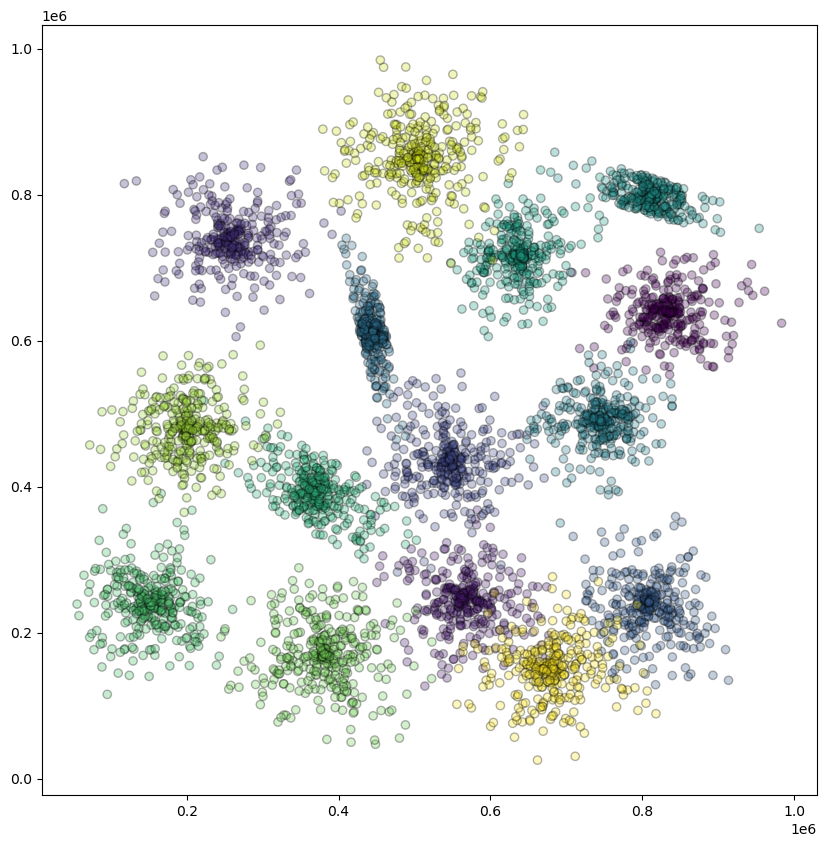

In [8]:
points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)
print("True number of clusters is {}".format(np.max(labels)))
plt.figure(figsize=(10, 10))
plt.scatter(points[:,0], points[:,1], c=labels, alpha=0.3, edgecolor='k')

plt.show()

In [9]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score, mutual_info_score
from sklearn.model_selection import GridSearchCV, ParameterGrid
from sklearn.metrics import make_scorer
from sklearn.preprocessing import StandardScaler

1) For each algorithm your task is to try to find the parameters leading to the best performance for n_clusters=true_number_of_clusters

In [47]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.cluster import Birch, AgglomerativeClustering
models = [
    KMeans(n_clusters=15,random_state=42),
    GaussianMixture(n_components=15,random_state=42),
    Birch(n_clusters=15),
    AgglomerativeClustering(n_clusters=15)
]

param_grids = [
    {
        'init': ['k-means++','random'],
        'max_iter': range(50,301,10)
    },
    {
        'covariance_type' : ['full', 'tied', 'diag', 'spherical'],
        'init_params' : ['kmeans', 'random'],
        'max_iter': range(50,301,10)
    },
    {
        'threshold' : 5.**np.arange(-5,1),
        'branching_factor' : np.arange(10,70,10)
    },
    {
        'affinity': ['euclidean', 'l1', 'l2', 'manhattan', 'cosine'], 
        'linkage' : ['complete', 'average', 'single']
    }
]
best_params_sil = dict()
best_params_mut = dict()

for model,param_grid in zip(models,param_grids):

    best_score_sil = -np.inf
    best_score_mut = -np.inf

    for model_params in ParameterGrid(param_grid):
        model.set_params(**model_params)
        preds = model.fit_predict(points)
        sil_score = silhouette_score(points,preds)
        mut_score = mutual_info_score(labels,preds)
        if sil_score > best_score_sil:
            best_score_sil = sil_score
            best_params_sil[type(model).__name__] = model_params
        if mut_score > best_score_mut:
            best_score_mut = mut_score
            best_params_mut[type(model).__name__] = model_params
    print(f'Model: {type(model).__name__}, best_params according to sil: {best_params_sil[type(model).__name__]}\
    score: {best_score_sil}')
    print(f'Model: {type(model).__name__}, best_params according to mut: {best_params_mut[type(model).__name__]}\
    score: {best_score_mut}')

    
### END SOLUTION (do not delete this comment!)

Model: KMeans, best_params according to sil: {'init': 'k-means++', 'max_iter': 50}    score: 0.626169141840935
Model: KMeans, best_params according to mut: {'init': 'k-means++', 'max_iter': 50}    score: 2.559577292157661
Model: GaussianMixture, best_params according to sil: {'covariance_type': 'tied', 'init_params': 'kmeans', 'max_iter': 50}    score: 0.6261804740217701
Model: GaussianMixture, best_params according to mut: {'covariance_type': 'full', 'init_params': 'kmeans', 'max_iter': 50}    score: 2.5677577082946756
Model: Birch, best_params according to sil: {'branching_factor': 10, 'threshold': 0.00032}    score: 0.6075939207380119
Model: Birch, best_params according to mut: {'branching_factor': 10, 'threshold': 0.00032}    score: 2.5077832875665407
Model: AgglomerativeClustering, best_params according to sil: {'affinity': 'euclidean', 'linkage': 'average'}    score: 0.6091772373449134
Model: AgglomerativeClustering, best_params according to mut: {'affinity': 'euclidean', 'linkag

2) Apply the algorithm with the true number of clusters and try out at least two other variants of the number of clusters: a smaller and a larger one than the true number.;

 Do not forget that despite the plot picturing just the KMeans and GuassianMizture, you will need to ADDITIONALLY try put and plot two other clustering methods. 

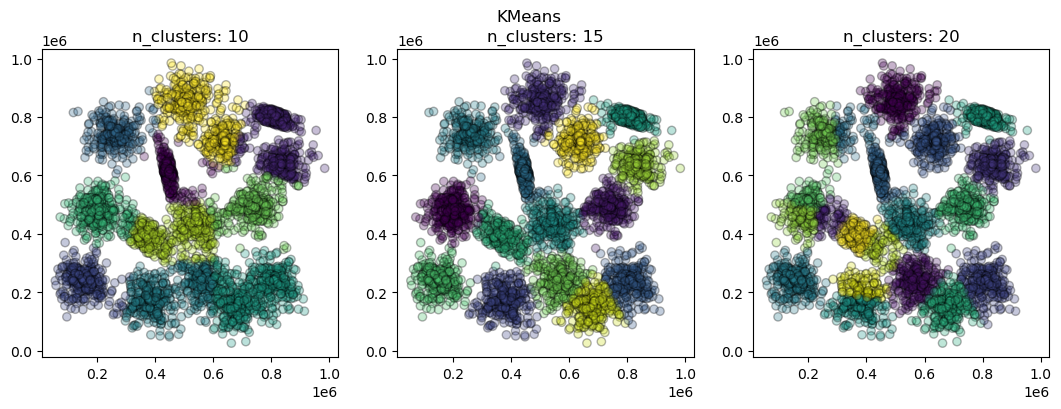

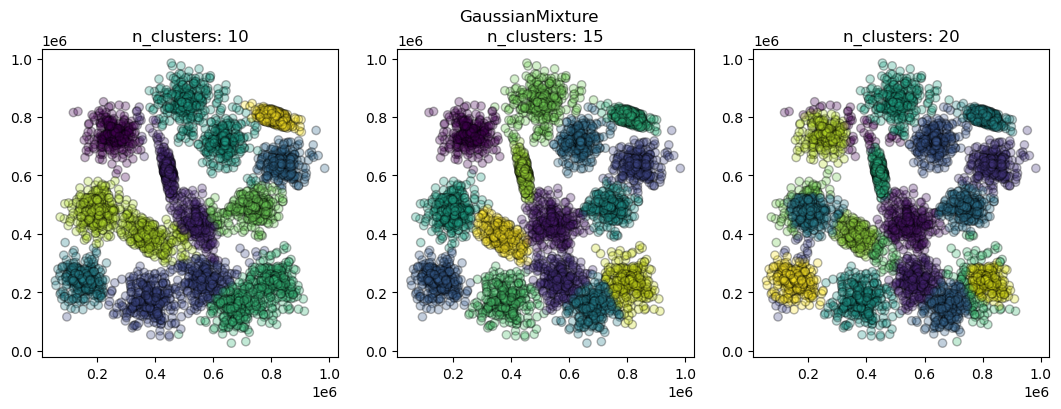

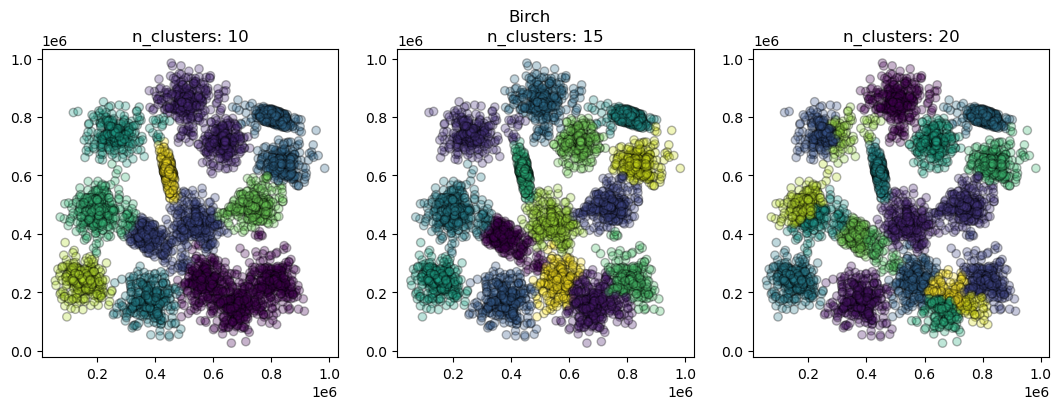

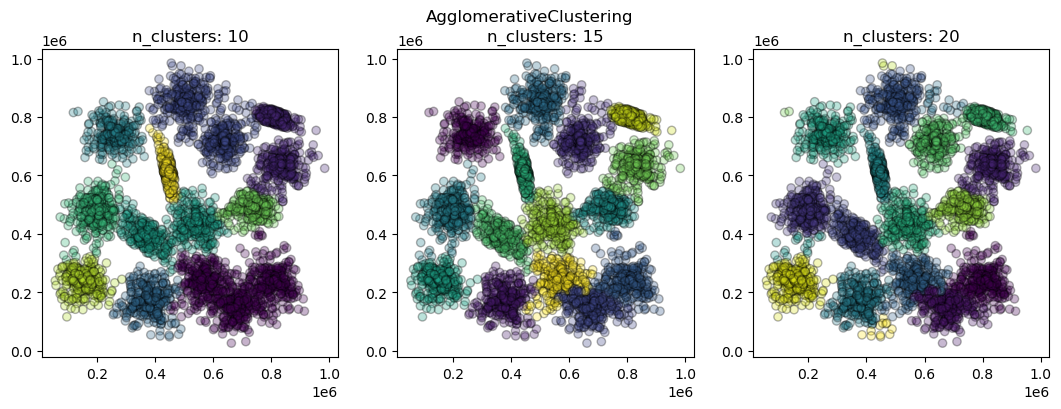

In [50]:
## BEGIN SOLUTION (do not delete this comment!)

# Obtained best parameters based on the silhouette_score and mutual_info_score
# are the same excluding the GaussianMixture. 
# Therefore as best parameters I will take the parameters, 
#obtained using the mutual_info_score


n_range = [10,15,20]

models = [
    KMeans(random_state=42),
    GaussianMixture(random_state=42),
    Birch(),
    AgglomerativeClustering()
]

for model in models:
    fig,axes = plt.subplots(1,3,figsize=(13,4))
    for n,ax in zip(n_range,axes):
        model.set_params(**best_params_mut[type(model).__name__])
        if type(model).__name__ == 'GaussianMixture':
            model.set_params(**{'n_components':n})
        else:
            model.set_params(**{'n_clusters':n})
        preds = model.fit_predict(points)
        ax.scatter(points[:,0],points[:,1],c=preds,alpha=0.3,edgecolors='k')
        ax.set_title(f'n_clusters: {n}')
        fig.suptitle(type(model).__name__)
        
### END SOLUTION (do not delete this comment!)

2) For each number of clusters vizualize the clustering result, calculate the clustering metrics and plot them;


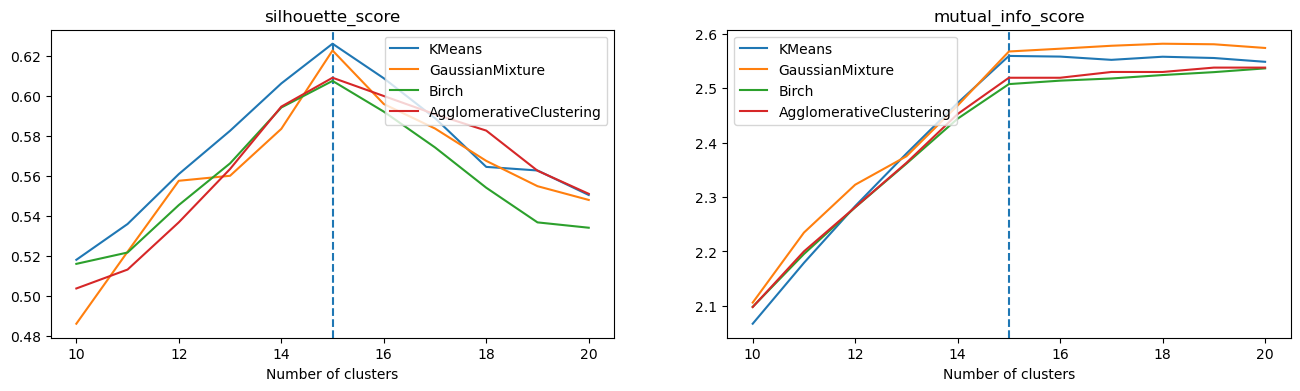

In [49]:
### BEGIN SOLUTION (do not delete this comment!)
models = [
    KMeans(random_state=42),
    GaussianMixture(random_state=42),
    Birch(),
    AgglomerativeClustering()
]

n_range = np.arange(10,21)

fig,axes = plt.subplots(1,2,figsize=(16,4))
axes[0].set_xlabel('Number of clusters')
axes[1].set_xlabel('Number of clusters')

axes[0].set_title('silhouette_score')
axes[1].set_title('mutual_info_score')

axes[0].axvline(15,ls='--')
axes[1].axvline(15,ls='--')

for model in models:
    sil_scores = []
    mut_scores = []

    for n in n_range:

        model.set_params(**best_params_mut[type(model).__name__])
        if type(model).__name__ == 'GaussianMixture':
            model.set_params(**{'n_components':n})
        else:
            model.set_params(**{'n_clusters':n})

        preds = model.fit_predict(points)

        sil_scores.append(silhouette_score(points,preds))
        mut_scores.append(mutual_info_score(labels,preds))

    axes[0].plot(n_range,sil_scores,label=type(model).__name__)
    axes[1].plot(n_range,mut_scores,label=type(model).__name__)
    axes[0].legend(loc='upper right')
    axes[1].legend(loc='upper left')


        
        
### END SOLUTION (do not delete this comment!)

### Task 3.2. Finding the Number of Clusters with Bootstrap. (1 pt.)
For a chosen algorithm find the best number of clusters using bootstrap. Based on your observations made at the previous task, choose one algorithm assuming **you do not have true labels and do not know the true number of clusters**.
1. Estimate variance of the clustering metric of your choice (i.e. *silhouette score*/*mutual information*/*adjusted mutual information*)and construct normal 95% **confidence interval (CI)**;
2. **Plot the metric** with the corresponding confidence intervals and show the best number of clusters.

__Hints:__ 
- you can choose bootstrap samples with any size, and sample number starting from `50`;
- you can use `scipy.stats.norm.interval()` to derive CI;

1) Estimate variance of the clustering metric of your choice (i.e. silhouette score/mutual information/adjusted mutual information)and construct normal 95% confidence interval (CI);

In [88]:
### BEGIN SOLUTION (do not delete this comment!)
from sklearn.utils import resample

points, labels = np.loadtxt('clustering.txt'), np.loadtxt('clustering_labels.txt')
labels = labels.astype(int)

n_range = np.arange(10,21)
means = []
variances = []
intervals = []
samp_numb = 100

for n in tqdm(n_range):
    scores = []
    for _ in range(samp_numb):
        clf = KMeans(n_clusters=n,random_state=42)
        bs_points= resample(points,n_samples=len(points))
        preds = clf.fit_predict(bs_points)
        score = silhouette_score(bs_points,preds)
        scores.append(score)
    mu = np.mean(scores)
    var = np.var(scores)

    means.append(mu)
    variances.append(var)
    intervals.append(stats.norm.interval(0.95,loc=mu,scale=np.sqrt(var)))
        



### END SOLUTION (do not delete this comment!)

  0%|          | 0/11 [00:00<?, ?it/s]

2) Plot the metric with the corresponding confidence intervals and show the best number of clusters.

Number of clusters: 10
	Variance: 0.00014147640068542361
	Confidence interval:(0.4976356812144259, 0.5442608146655198)
Number of clusters: 11
	Variance: 0.0001573648878971048
	Confidence interval:(0.5185129481080829, 0.567686548207318)
Number of clusters: 12
	Variance: 0.00012681825890218566
	Confidence interval:(0.5400903369400841, 0.5842340621696055)
Number of clusters: 13
	Variance: 0.00010981771405703396
	Confidence interval:(0.5670641521485208, 0.608142624677711)
Number of clusters: 14
	Variance: 9.505107882951114e-05
	Confidence interval:(0.5937755734824758, 0.6319925752061127)
Number of clusters: 15
	Variance: 9.54684590162963e-05
	Confidence interval:(0.6073258538792027, 0.6456266713110136)
Number of clusters: 16
	Variance: 8.206180944282552e-05
	Confidence interval:(0.5971230896681278, 0.6326329227697497)
Number of clusters: 17
	Variance: 9.5560532985215e-05
	Confidence interval:(0.5790210082888889, 0.6173402907637102)
Number of clusters: 18
	Variance: 0.0001586305209919367
	C

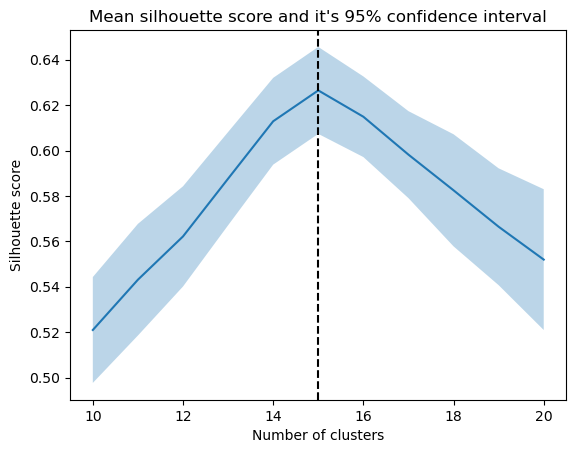

In [94]:
### BEGIN SOLUTION (do not delete this comment!)
for n,variance,interval in zip(n_range,variances,intervals):
    print(
        f'Number of clusters: {n}\n\tVariance: {variance}\n\tConfidence interval:{interval}'
    )
    
plt.plot(n_range,means)
plt.fill_between(n_range, np.array(intervals)[:, 0], np.array(intervals)[:, 1], alpha=.3)
plt.title("Mean silhouette score and it's 95% confidence interval")
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score')
plt.axvline(15,ls='--',color='black')
### END SOLUTION (do not delete this comment!)

## Task 4. Practice with Different Anomaly Detection Algorithms. (2 pts)

### Task 4.1 (1 pt)

- Here we will use __fraud_dataset__ (creditcard.csv )
- Compute the __contamination__ (or impurity) on the **test** set as the ratio of anomaly objects to all the objects.  
- Predict the anomaly with any **three** Anomaly detection methods among ones from: https://scikit-learn.org/stable/modules/outlier_detection.html, note, we do not use true labels to fit anomaly detectors.
- Explore, how the `roc_auc_score` for anomaly detectors changes with `contamination` value, taking a grid `[0.1*contamination, 1*contamination, 10*contamination]`. Point out the best performing algorithm.

In [15]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, precision_score

data = pd.read_csv('creditcard.csv')

X = data.drop(columns="Class")
y = data["Class"]

# keep the split fixed
tt_split = train_test_split(X, y, test_size = 0.1, stratify=y, random_state= 42)
train_X, test_X, train_y, test_y = tt_split 

# delete the targets for training
train_y = 0

In [16]:
### BEGIN SOLUTION (do not delete this comment!)
  
# impurity estimation on test data

contamination = test_y[test_y==1].sum()/len(test_y)
contamination
### END SOLUTION (do not delete this comment!)

0.01693743518838576

In [47]:
### BEGIN SOLUTION (do not delete this comment!)

# Choose three anomaly detection models
 # >>> your solution here <<<

models = [ 
    IsolationForest(random_state=42,n_jobs=-1),
    EllipticEnvelope(support_fraction =1,random_state=42),
    LocalOutlierFactor(novelty=True,n_jobs=-1)
]

for i in [0.1, 1, 10]:
    for model in models:

        model.set_params(**{'contamination':contamination*i})
        model.fit(train_X.values)

        preds = np.array(model.predict(test_X.values)<0,dtype=int)

        ra_score = roc_auc_score(test_y,preds)
        precision = precision_score(test_y,preds,average='micro')

        print(f'{model.__class__.__name__}: Contamination: {contamination*i:.3f} \
ROC/AUC: {ra_score:.3f} Precision: {precision:.3f}')
   

### END SOLUTION (do not delete this comment!)

IsolationForest: Contamination: 0.002 ROC/AUC: 0.541 Precision: 0.984
EllipticEnvelope: Contamination: 0.002 ROC/AUC: 0.520 Precision: 0.983
LocalOutlierFactor: Contamination: 0.002 ROC/AUC: 0.499 Precision: 0.981
IsolationForest: Contamination: 0.017 ROC/AUC: 0.772 Precision: 0.986
EllipticEnvelope: Contamination: 0.017 ROC/AUC: 0.742 Precision: 0.985
LocalOutlierFactor: Contamination: 0.017 ROC/AUC: 0.500 Precision: 0.963
IsolationForest: Contamination: 0.169 ROC/AUC: 0.872 Precision: 0.848
EllipticEnvelope: Contamination: 0.169 ROC/AUC: 0.862 Precision: 0.848
LocalOutlierFactor: Contamination: 0.169 ROC/AUC: 0.506 Precision: 0.817


### Task 4.2 (1 pt)

The idea is to see when anomaly detection methods, trained with no labels, can facilitate the prediction of the classifier. Imagine a real case scenario: you have labelled only a small portion of the dataset and a bunch of unlabeled data. We will simulate the situation when __90%__ of data is unlabeled and we still desire to achieve good performance. 


As you can score your predictions only on the __10%__ of the sample, you better do it in cross validation to ensure the model stability.
1. Take your favorite classifier and estimate the performance on __test set__ using `StratifiedKFold(n_splits=10, random_state = 42)` with `roc_auc` and `precision_score`. You can use test set upsampling and other instruments to enforce your prediction. 

> Do not get confused, here we swap __train__ and __test__ and use __test__ as if it's the only data we have on our hands.

2. Try to enhance the classifier performance in  `roc_auc` or `precision_score` (or ideally both), building the ensemble, using __Anomaly detection__ methods from the previous task. You can fit __Anomaly detection__ methods on both  __training set__ and subset from __test set__ on the cross-validation fold.

__NOTE:__ try not to overfit, thus not adjust the `contamination` while training, and refit classifiers on each fold. 

__Hints:__ `sklearn.ensemble.VotingClassifier` does not support Anomaly detection methods, so you are to write it yourself. And `np.logical_and` or `np.logical_or` will suit for the trivial ensemble.

In [63]:
### BEGIN SOLUTION (do not delete this comment!)

# choose your favorite classifier, e.g. from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=42)

from sklearn.model_selection import StratifiedKFold

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

roc_auc_scores = [] 
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<
    to_train_X,to_train_y = test_X.iloc[train_index],test_y.iloc[train_index]
    to_test_X,to_test_y = test_X.iloc[test_index],test_y.iloc[test_index]
    rus = RandomOverSampler(random_state=42)
    X,y = rus.fit_resample(to_train_X,to_train_y)

    clf.fit(X,y)

    preds = clf.predict(to_test_X)
    roc_auc_scores.append(roc_auc_score(to_test_y,preds))
    pr_score.append(precision_score(to_test_y,preds))

print(f'ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}')
print(f'Precision mean: {np.mean(pr_score)} std: {np.std(pr_score)}')
### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.7996886582653818 std: 0.11334969350836614
Precision mean: 0.6999206349206349 std: 0.20920624382780303


Try to enhance the classifier performance using Anomaly detection methods

In [64]:
### BEGIN SOLUTION (do not delete this comment!)

clf = DecisionTreeClassifier(random_state=42)

skf = StratifiedKFold(n_splits=10, random_state = 42, shuffle=True)
skf.get_n_splits(test_X, test_y)

models = [ 
    IsolationForest(random_state=42,n_jobs=-1),
    EllipticEnvelope(support_fraction =1,random_state=42),
    LocalOutlierFactor(novelty=True,n_jobs=-1)
]

roc_auc_scores = [] 
pr_score = []

for train_index, test_index in skf.split(test_X, test_y):
    # >>> your solution here <<<

    to_train_X,to_train_y = test_X.iloc[train_index],test_y.iloc[train_index]
    to_test_X,to_test_y = test_X.iloc[test_index],test_y.iloc[test_index]

    models_y = []

    for model in models:
        model.fit(to_train_X.values)
        model_preds = np.array(model.predict(to_test_X.values)<0,dtype=int)
        models_y.append(model_preds)
    
    clf.fit(to_train_X,to_train_y)
    clf_preds = clf.predict(to_test_X)

    preds = clf_preds & (models_y[0] | models_y[1] | models_y[2])

    roc_auc_scores.append(roc_auc_score(to_test_y,preds))
    pr_score.append(precision_score(to_test_y,preds))

print(f'ROC/AUC mean: {np.mean(roc_auc_scores)} std: {np.std(roc_auc_scores)}')
print(f'Precision mean: {np.mean(pr_score)} std: {np.std(pr_score)}')
### END SOLUTION (do not delete this comment!)

ROC/AUC mean: 0.8242976278724982 std: 0.051069594397161674
Precision mean: 0.9016666666666666 std: 0.12526638282742367


Write 1-2 sentences on your findings.

*BEGIN SOLUTION (do not delete this comment!)*<br>
First I created a custom ensemble classifier in the following way: DTC_predictions or (IsolationForest_predictions and EllipticEnvelope_predictions and LocalOutlierFacrot_predictions). But it didn't help to improve both metrics. So instead I tried to change replace and' with ors' and vice versa,as anomaly detection methods are more reliable than pure DecisionTree.And this led to the imporvement of both metrics<br>
*END SOLUTION (do not delete this comment!)*